# Introdução ao Processamento de Linguagem Natural com Python (Parte 1)

### Explorando e vetorizando dados textuais.

In [1]:
import pandas as pd

resenha = pd.read_csv("dados/imdb-reviews-pt-br.csv.bz2")

In [2]:
resenha.head(10)

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg
5,6,"A funny thing happened to me while watching ""M...",Uma coisa engraçada aconteceu comigo enquanto ...,neg
6,7,This German horror film has to be one of the w...,Este filme de terror alemão tem que ser um dos...,neg
7,8,"Being a long-time fan of Japanese film, I expe...","Sendo um fã de longa data do cinema japonês, e...",neg
8,9,"""Tokyo Eyes"" tells of a 17 year old Japanese g...","""Tokyo Eyes"" fala de uma menina japonesa de 17...",neg
9,10,Wealthy horse ranchers in Buenos Aires have a ...,Fazendeiros ricos em Buenos Aires têm uma long...,neg


In [3]:
print("Negativo\n")
print(resenha["text_pt"][200])

Negativo

Este é o terceiro filme em um mês que eu assisti que não saiu do jeito que eu esperava. Os dois primeiros são A Dália Negra e Hollywoodland, nenhum dos quais deu novas idéias de quem cometeu os crimes. Eu sempre tive um fascínio com OVNIs e estava tão empolgado para ver um novo filme sobre o tema da investigação sobre OVNIs que não era um comédia. Mas depois de 30 minutos, tudo deu muito errado. Eu poderia ter defendido a atuação, os ângulos de câmera, os estereótipos se houvesse uma boa história sobre perseguir OVNIs, mas nenhum aqui. Eu não estou dizendo que havia algo de errado com o assunto, mas Netflix empurrou este filme como um cético OVNI e um crente de OVNI investigando vários sitations.I parou de assistir a meio caminho. Não posso acreditar que perdi tanto tempo com este. Por favor, não cometa o mesmo erro que eu fiz.


In [4]:
print("Positivo\n")
print(resenha["text_pt"][49002])

Positivo

Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo maior

In [5]:
classificacao = resenha["sentiment"].replace(["neg", "pos"],[0, 1])

In [6]:
resenha["classificacao"] = classificacao
resenha.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [7]:
resenha.tail()

,id,text_en,text_pt,sentiment,classificacao
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1
49458,49460,Working-class romantic drama from director Mar...,O drama romântico da classe trabalhadora do di...,pos,1


In [8]:
print(resenha["classificacao"].value_counts())

0    24765
1    24694
Name: classificacao, dtype: int64


In [9]:
from sklearn.feature_extraction.text import CountVectorizer

textos = ["Assisti um filme ótimo", "Assisti um filme péssimo"]

vetorizar = CountVectorizer(lowercase = False)
bag_of_words = vetorizar.fit_transform(textos)

In [10]:
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [11]:
vetorizar.get_feature_names()

['Assisti', 'filme', 'péssimo', 'um', 'ótimo']

In [12]:
vetorizado = pd.SparseDataFrame(
    bag_of_words,
    columns = vetorizar.get_feature_names()
)
vetorizado

,Assisti,filme,péssimo,um,ótimo
0,1,1,NaN,1,1.0
1,1,1,1.0,1,NaN


#### Exercício 1

In [19]:
from nltk import tokenize
frase = "Os cursos da Alura são ótimos, além de ótimos, têm alunos ótimos!"
token_espaco = tokenize.WhitespaceTokenizer()
token_pontuacao = tokenize.WordPunctTokenizer()

token_1 = token_espaco.tokenize(frase)
token_2 = token_pontuacao.tokenize(frase)

print(token_1)
print(token_2)

['Os', 'cursos', 'da', 'Alura', 'são', 'ótimos,', 'além', 'de', 'ótimos,', 'têm', 'alunos', 'ótimos!']
['Os', 'cursos', 'da', 'Alura', 'são', 'ótimos', ',', 'além', 'de', 'ótimos', ',', 'têm', 'alunos', 'ótimos', '!']


###  Classificando sentimentos: um passo-a-passo

In [13]:
vetorizar = CountVectorizer(lowercase = False, max_features = 50)
bag_of_words = vetorizar.fit_transform(resenha["text_pt"])

In [14]:
print(bag_of_words.shape)

(49459, 50)


In [15]:
from sklearn.model_selection import train_test_split

treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              resenha["classificacao"],
                                                              random_state = 42)

In [16]:
print(treino.shape)
print(teste.shape)

(37094, 50)
(12365, 50)


In [17]:
from sklearn.linear_model import LogisticRegression

regressao_logistica = LogisticRegression(solver = "lbfgs")
regressao_logistica.fit(treino, classe_treino)

previsao_teste = regressao_logistica.predict_proba(teste)
print(previsao_teste)

[[0.25696739 0.74303261]
 [0.72224991 0.27775009]
 [0.70076066 0.29923934]
 ...
 [0.46019618 0.53980382]
 [0.46166722 0.53833278]
 [0.61777927 0.38222073]]


In [20]:
previsao_teste_bol = previsao_teste[:,1] >= 0.5
print(previsao_teste_bol)

[ True False False ...  True  True False]


In [21]:
import numpy as np

previsao_teste_int = previsao_teste_bol.astype(np.int)
print(previsao_teste_int)

[1 0 0 ... 1 1 0]


In [22]:
from sklearn.metrics import accuracy_score

acuracia_teste = accuracy_score(classe_teste, previsao_teste_int)
print(acuracia_teste)

0.6583097452486858


### Visualizando os dados com WordCloud

In [25]:
%matplotlib inline

from wordcloud import WordCloud

todos_palavras = ' '.join([texto for texto in resenha["text_pt"]])

In [26]:
nuvem_palavras = WordCloud(width = 800, height = 500, max_font_size = 110,
                          collocations = False).generate(todos_palavras)

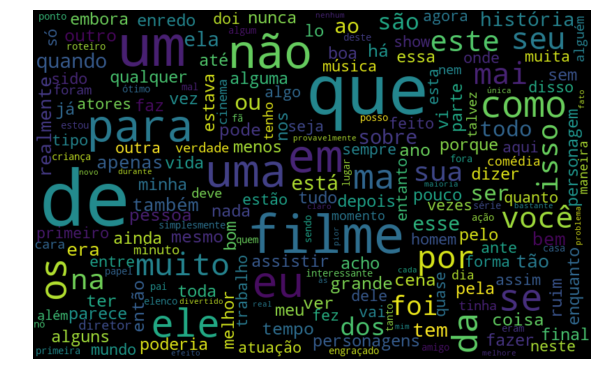

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize= (10, 7))
plt.imshow(nuvem_palavras, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [28]:
resenha_positiva = resenha.query("sentiment == 'pos'")

In [29]:
resenha_positiva.head()

,id,text_en,text_pt,sentiment,classificacao
12389,12391,I went and saw this movie last night after bei...,Eu fui e vi este filme ontem à noite depois de...,pos,1
12390,12392,Actor turned director Bill Paxton follows up h...,"O diretor do ator, Bill Paxton, segue sua prom...",pos,1
12391,12393,As a recreational golfer with some knowledge o...,Como um jogador de recreio com algum conhecime...,pos,1
12392,12394,"I saw this film in a sneak preview, and it is ...","Eu vi esse filme em uma prévia, e é delicioso....",pos,1
12393,12395,Bill Paxton has taken the true story of the 19...,Bill Paxton levou a verdadeira história do gol...,pos,1


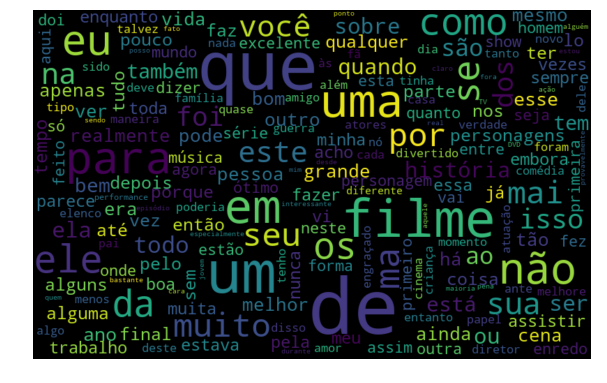

In [30]:
palavras_pos = ' '.join([texto for texto in resenha_positiva["text_pt"]])
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110,
                           collocations=False).generate(palavras_pos)
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

In [31]:
resenha_negativa = resenha.query("sentiment == 'neg'")

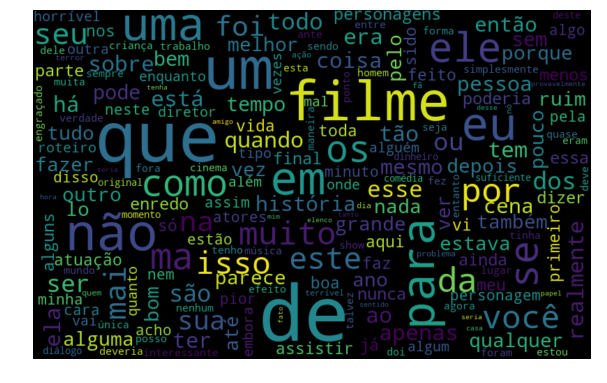

In [32]:
palavras_neg = ' '.join([texto for texto in resenha_negativa["text_pt"]])
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110,
                           collocations=False).generate(palavras_neg)
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

### Tokenização com NLTK para criar uma nova visualização.

In [40]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rodrigo/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [41]:
from nltk import tokenize

frase = "Bem vindo ao mundo do PLN"
token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
print(token_frase)

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN']


In [42]:
import nltk

todas_palavras = ' '.join([texto for texto in resenha["text_pt"]])
frequencia = nltk.FreqDist(token_espaco.tokenize(todas_palavras))
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                             "Frequência": list(frequencia.values())})

In [43]:
df_frequencia.head()

,Palavra,Frequência
0,Mais,1538
1,uma,130888
2,"vez,",1927
3,o,244881
4,Sr.,1741


In [44]:
df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = 10)

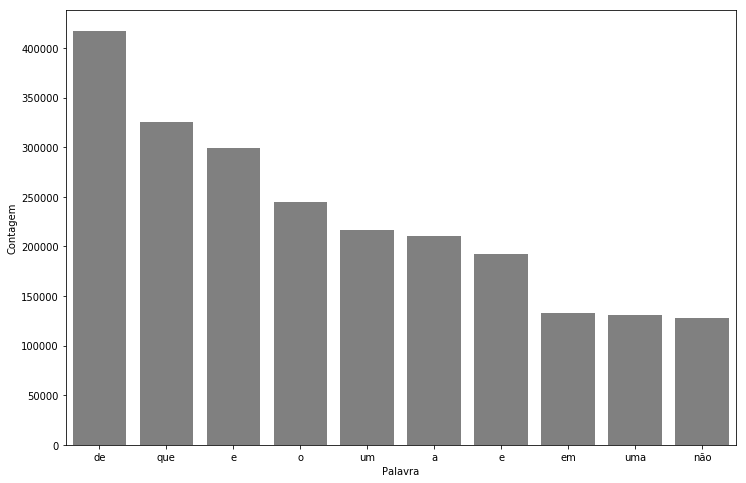

In [46]:
import seaborn as sns

plt.figure(figsize=(12,8))
ax = sns.barplot(data = df_frequencia, x= "Palavra", y = "Frequência", color = 'gray')
ax.set(ylabel = "Contagem")
plt.show()

### Criando funções para um pipeline de otimização.

In [47]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")
frase_processada = list()

for opiniao in resenha["text_pt"]:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha["tratamento_1"] = frase_processada   

In [48]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [49]:
print("Frase text_pr\n")
print(resenha["text_pt"][0])
print("\n Frase tratamento_1\n")
print(resenha["tratamento_1"][0])

Frase text_pr

Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.

 Fras

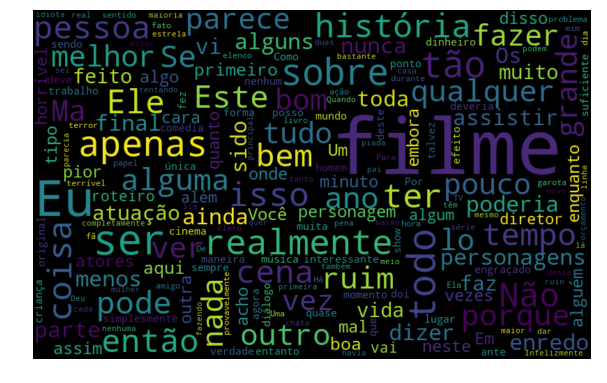

In [50]:
def nuvem_palavras_neg(texto, coluna_texto):
    texto_negativo = texto.query("sentiment == 'neg'")
    todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])
    nuvem_palavras = WordCloud(width = 800, height = 500,
                                max_font_size=110, collocations=False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
nuvem_palavras_neg(resenha, "tratamento_1")

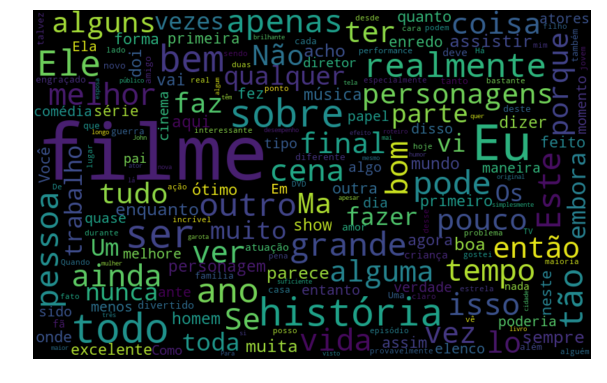

In [51]:
def nuvem_palavras_pos(texto, coluna_texto):
    texto_positivo = texto.query("sentiment == 'pos'")
    todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])
    nuvem_palavras = WordCloud(width = 800, height = 500,
                                max_font_size=110, collocations=False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
nuvem_palavras_pos(resenha, "tratamento_1")

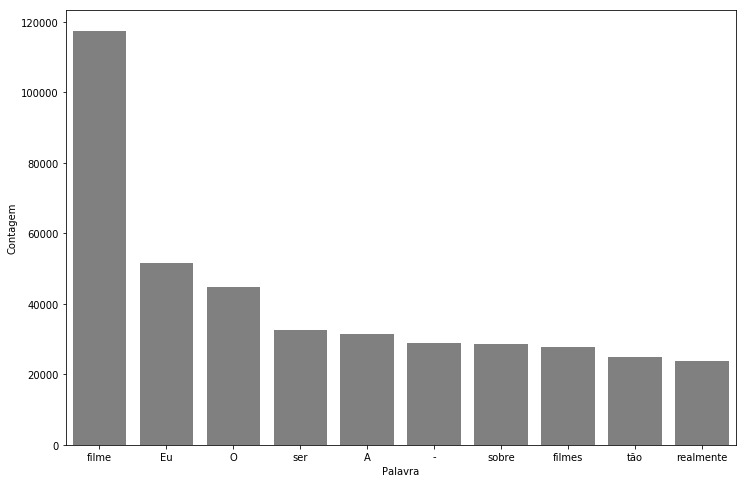

In [52]:
def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    frequencia = nltk.FreqDist(token_espaco.tokenize(todas_palavras))
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                 "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x= "Palavra", y = "Frequência", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()   

pareto(resenha, "tratamento_1", 10)

In [53]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                                 texto[coluna_classificacao],
                                                                 random_state = 42)
    
    regressao_logistica = LogisticRegression(solver="lbfgs")
    regressao_logistica.fit(treino, classe_treino)
    
    return regressao_logistica.score(teste, classe_teste)

acuracia_teste = classificar_texto(resenha, "tratamento_1", "classificacao")
print(acuracia_teste)

0.6607359482410028


# Introdução ao Processamento de Linguagem Natural com Python (Parte 2)

### Otimizando a análise: o primeiro passo

In [54]:
from nltk import tokenize

frase = "Olá mundo!"
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)

print(token_frase)

['Olá', 'mundo', '!']
